# Starting Multivariate Regression
Code here is pulled from https://towardsdatascience.com/multiple-linear-regression-in-four-lines-of-code-b8ba26192e84

In [139]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Cleaning Data

In [140]:
dataset = pd.read_csv('deviceSummary.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

#### Spliting Classes

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Calculating Regressions

In [142]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# Uncomment to print test vs pred
#for i in range(len(y_pred)):
#    print("Test: " + str(y_test[i]) + ", Pred: " + str(round(y_pred[i], 2)))

#### Calculating Statistical Values

In [143]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("R Value: " + str(r_value))
print("R-Squared: " + str(r_value*r_value))

R Value: 0.7249724126246283
R-Squared: 0.5255849990667744


#### Graphing Results

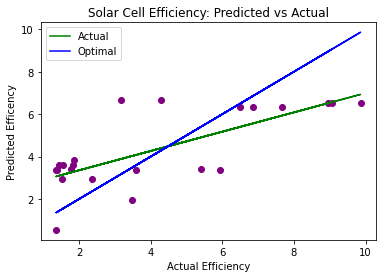

In [144]:
plt.scatter(y_test, y_pred, color='purple')
plt.plot(y_test, slope*y_test + intercept, color='green', label="Actual")
plt.plot(y_test, y_test, color='blue', label="Optimal")
plt.title("Solar Cell Efficiency: Predicted vs Actual")
plt.xlabel("Actual Efficiency")
plt.ylabel("Predicted Efficency")
plt.legend()
print('')